# **Chapter 15 (NeuralProphet Recipe)**
## *Advanced Techniques for Complex Time Series*, 

This chapter will introduce more complex time series data that contains multiple seasonal patterns. The chapter includes how such time series data can be decomposed and explores different modeling techniques, including state-space models.


* Forecasting time series with multiple seasonal patterns using NeuralProphet

## Technical Requirements

It is recommended to create a new virtual Python environment this way, you can install all the required dependencies without any conflicts or issues with your current environment. If you need a quick refresher on creating a virtual Python environment, check out the *Development environment setup* recipe from **Chapter 1**, *Getting Started with Time Series Analysis*. The chapter covers two methods – using conda and venv.


The following instructions will show how to create a virtual environment using conda. You can call the environment any name you like – in the following example, we will name our environment neuralprophet:

```
conda create -n neuralprophet python=3.9 -y
conda activate neuralprophet
pip install "neuralprophet[live]"
```

To make the new neuralprophet environment visible within Jupyter, you can run the following code:

```
python -m ipykernel install --user --name neuralprophet --display-name "NeuralProphet"
```

If you need additional libraries to install – for example, statsmodels – you can use pip:
```
pip install statsmodels
```

# Forecasting with NeuralProphet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

In [2]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [14, 4]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

In [3]:
from neuralprophet import NeuralProphet

In [4]:
day = 24
week = day*7
month = round(week*4.35)
year = round(month*12)
print(f'''
day = {day} hours
week = {week} hours
month = {month} hours
year = {year} hours
''')


day = 24 hours
week = 168 hours
month = 731 hours
year = 8772 hours



In [5]:
folder = Path('../../datasets/Ch15/')
file = folder.joinpath('AEP_hourly.csv')

df = pd.read_csv(file, index_col='Datetime', parse_dates=True)
df.sort_index(inplace=True)
df = df.resample('H').max()
df.columns = ['y']
df.ffill(inplace=True)

In [6]:
energy = df.copy()
energy.reset_index(inplace=True)
energy.columns = ['ds', 'y']

In [7]:
train = energy.iloc[:-month*2]
val = energy.iloc[-month*2:-month]
test = energy.iloc[-month:]

In [8]:
m = NeuralProphet()
metrics = m.fit(train, validation_df=val)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.999% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 55


  0%|          | 0/176 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.40E-01, min: 1.25E+00


  0%|          | 0/176 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.40E-01, min: 1.78E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.26E-01
Epoch[55/55]: 100%|██████████████████████████████████████| 55/55 [02:16<00:00,  2.48s/it, SmoothL1Loss=0.0115, MAE=1.23e+3, RMSE=1.59e+3, RegLoss=0, MAE_val=1.41e+3, RMSE_val=1.84e+3, SmoothL1Loss_val=0.0152]


In [9]:
n = len(test)+len(val)
future = m.make_future_dataframe(df=train, periods=n)
forecast = m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.999% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


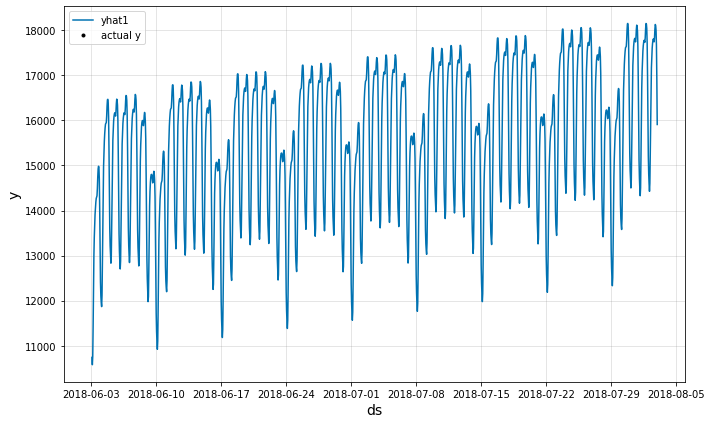

In [10]:
fig = m.plot(forecast)

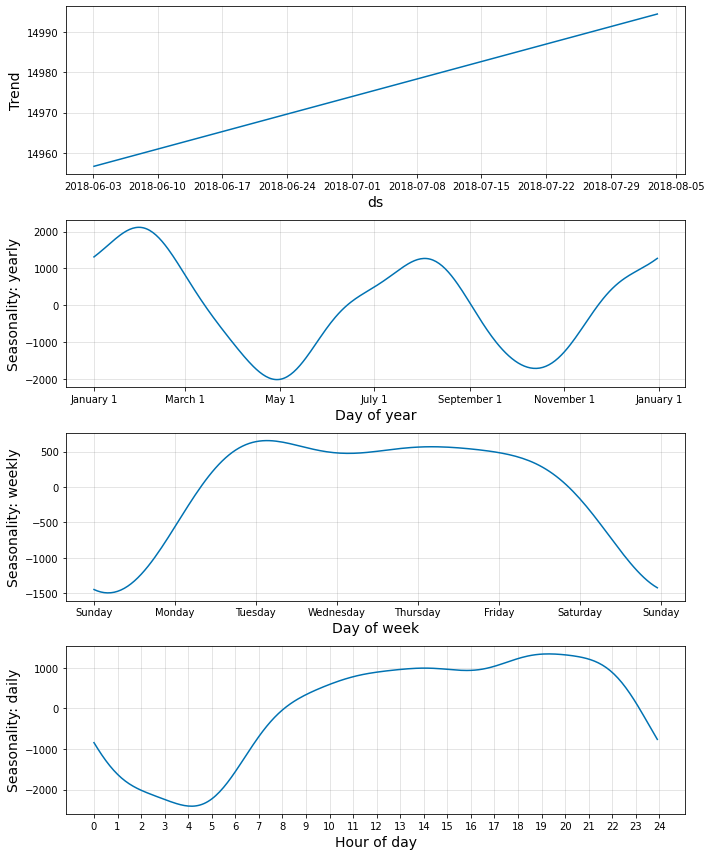

In [11]:
fig = m.plot_components(forecast)

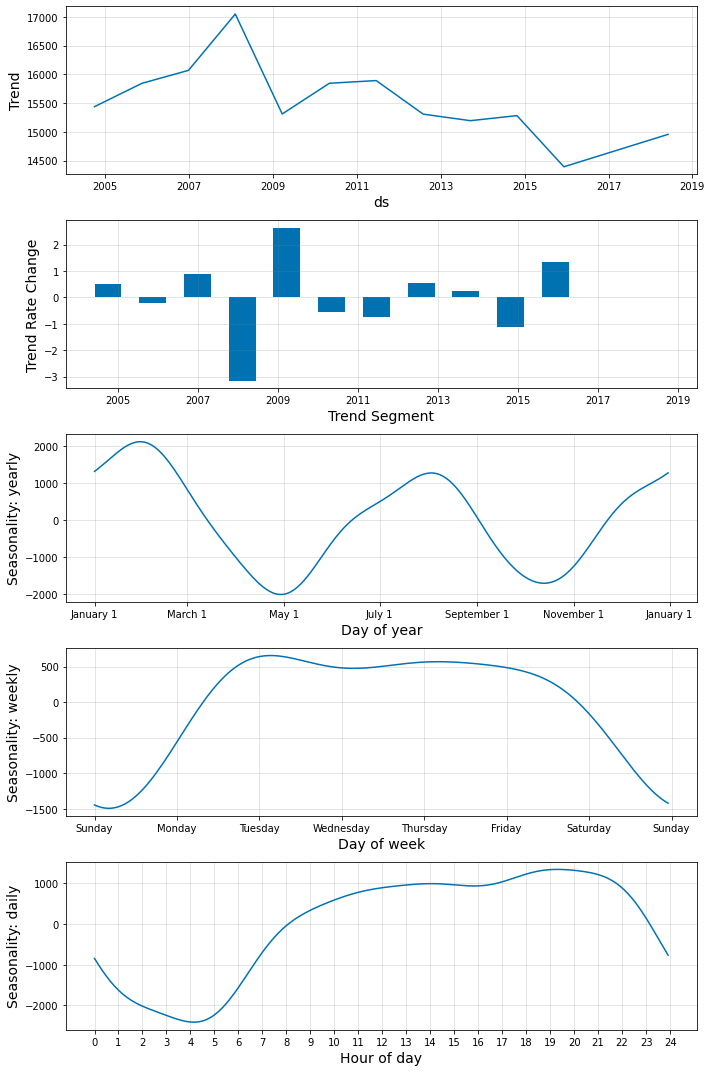

In [12]:
fig = m.plot_parameters()

In [13]:
test

,ds,y
120565,2018-07-03 14:00:00,20999.0
120566,2018-07-03 15:00:00,21321.0
120567,2018-07-03 16:00:00,21367.0
120568,2018-07-03 17:00:00,21481.0
120569,2018-07-03 18:00:00,21448.0
...,...,...
121291,2018-08-02 20:00:00,17673.0
121292,2018-08-02 21:00:00,17303.0
121293,2018-08-02 22:00:00,17001.0
121294,2018-08-02 23:00:00,15964.0


In [14]:
forecast.set_index('ds')['yhat1'].iloc[:-month]

ds
2018-06-03 03:00:00    10742.393555
2018-06-03 04:00:00    10579.242188
2018-06-03 05:00:00    10758.936523
2018-06-03 06:00:00    11441.674805
2018-06-03 07:00:00    12323.556641
                           ...     
2018-07-03 09:00:00    16489.232422
2018-07-03 10:00:00    16732.626953
2018-07-03 11:00:00    16911.992188
2018-07-03 12:00:00    17014.544922
2018-07-03 13:00:00    17071.208984
Name: yhat1, Length: 731, dtype: float64

In [15]:
prediction = forecast.set_index('ds').loc['2018-07-03 14:00:00':]['yhat1']

Text(0.5, 1.0, 'Out-of-Sample Forecast: Actual vs Predicted')

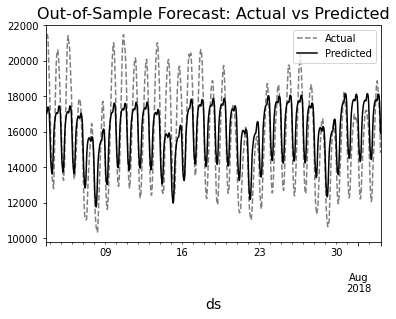

In [16]:
test.set_index('ds').plot(style='k--', alpha=0.5)
prediction.plot(style='k')
plt.legend(['Actual', 'Predicted'])
plt.title('Out-of-Sample Forecast: Actual vs Predicted')

In [17]:
from statsmodels.tools.eval_measures import rmse, rmspe

In [18]:
rmspe(test['y'].values, prediction.values)

1.1610722211486375

In [19]:
rmse(test['y'].values, prediction.values)

1790.089574641523

## There is more

In [20]:
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

In [21]:
m = NeuralProphet(learning_rate = 0.1)

train, test = m.split_df(df=energy, freq="H", valid_p=0.2)

train_results = m.fit(df=train, freq="H")
test_results = m.test(df=test)

test_results

,SmoothL1Loss,MAE,RMSE
0,0.013924,1371.624118,1704.777627


In [22]:
print(test_results)

   SmoothL1Loss          MAE         RMSE
0      0.013924  1371.624118  1704.777627


In [23]:
print(train_results)

    SmoothL1Loss          MAE         RMSE  RegLoss
0       0.276779  5628.463218  6924.579659      0.0
1       0.011399  1226.951832  1593.452456      0.0
2       0.011558  1238.136060  1604.269005      0.0
3       0.012068  1270.161852  1639.142495      0.0
4       0.012685  1305.470571  1680.681601      0.0
5       0.013487  1350.827059  1732.675942      0.0
6       0.014353  1396.276762  1786.893854      0.0
7       0.015176  1441.247377  1838.249261      0.0
8       0.016311  1497.168241  1905.542366      0.0
9       0.017454  1549.738706  1969.227450      0.0
10      0.018346  1592.798623  2019.864112      0.0
11      0.019577  1647.016438  2085.000628      0.0
12      0.020805  1698.418047  2148.418053      0.0
13      0.021828  1742.050001  2199.957866      0.0
14      0.022668  1776.787794  2242.987023      0.0
15      0.023088  1788.965981  2260.669376      0.0
16      0.022713  1779.113295  2244.260633      0.0
17      0.022831  1782.373861  2248.137058      0.0
18      0.02

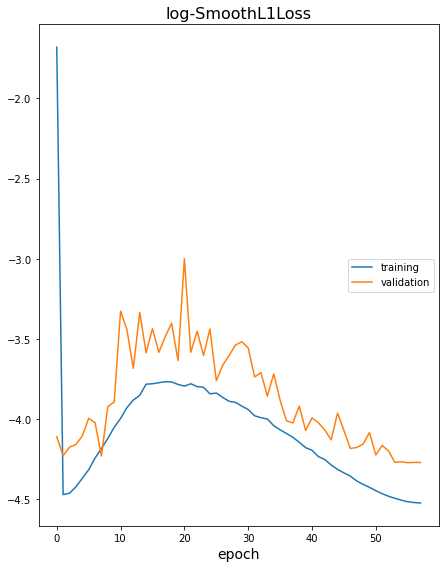

log-SmoothL1Loss
	training         	 (min:   -4.524, max:   -1.681, cur:   -4.524)
	validation       	 (min:   -4.272, max:   -3.000, cur:   -4.271)


In [24]:
m = NeuralProphet(learning_rate = 0.1)
train, test = m.split_df(df=energy, freq="H", valid_p=0.2)
metrics = m.fit(df=train, freq="H", validation_df=test, progress="plot")

In [25]:
print(metrics.tail(1))

    SmoothL1Loss          MAE         RMSE  RegLoss  SmoothL1Loss_val  \
57      0.010851  1198.474296  1554.106593      0.0          0.013966   

        MAE_val     RMSE_val  
57  1374.111756  1707.607555  
